In [2]:
pip install seaborn


   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.9 kB 262.6 kB/s eta 0:00:02
   ---- ---------------------------------- 30.7/294.9 kB 262.6 kB/s eta 0:00:02
   ----- --------------------------------- 41.0/294.9 kB 219.4 kB/s eta 0:00:02
   ---------- ---------------------------- 81.9/294.9 kB 327.3 kB/s eta 0:00:01
   ---------------------- --------------- 174.1/294.9 kB 583.1 kB/s eta 0:00:01
   -------------------------------------- 294.9/294.9 kB 912.4 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\matt-\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


C:\Users\matt-\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Précision avec régularisation L2 (alpha=0.111) : 97.09%
Probabilités prédites pour la première image de test :
 [2.58975746e-07 1.18984406e-10 2.06568620e-05 9.99016804e-04
 4.12976459e-10 2.67632254e-06 1.14806144e-10 7.33645678e-08
 9.98975515e-01 1.74430545e-06]

Classes prédites (les 20 premières) : [8 4 8 7 7 0 6 2 7 4 3 9 9 8 2 5 9 1 7 8]
Classes réelles     (les 20 premières) : 46730    8
48393    4
41416    8
34506    7
43725    7
11615    0
24656    6
22411    2
936      7
56364    4
25949    3
31524    9
4678     9
16864    8
4230     2
65711    5
3787     9
31386    1
63361    7
9900     8
Name: class, dtype: int64


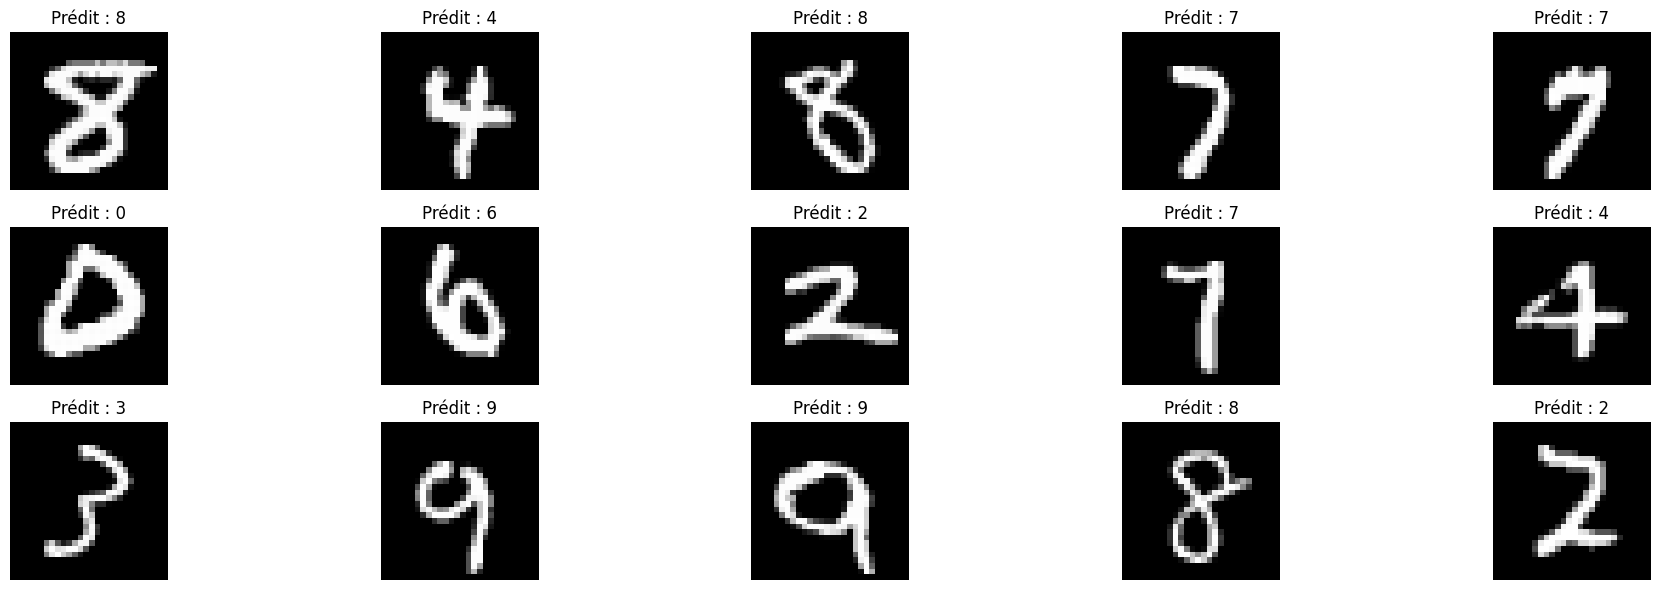

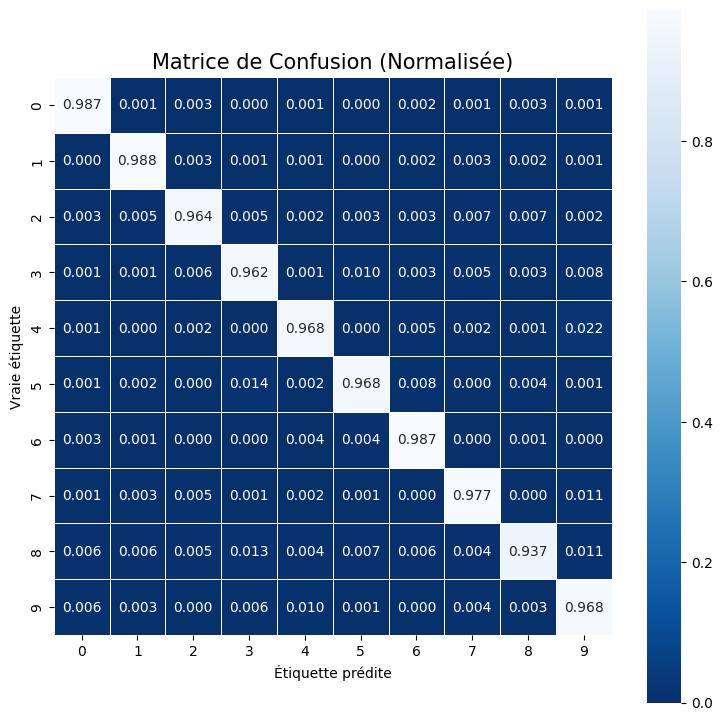


Précision du modèle sur l'ensemble de test : 97.09%


In [16]:
# -*- coding: utf-8 -*-
# Author : Badr TAJINI

'''
# Code Python très simple pour construire un modèle MLP basique avec la visualisation de la prédiction
#
# Objectifs de l'Étape 5 :
#
# 1- Visualisation des Prédictions : Obtenir une compréhension visuelle des performances du modèle en examinant directement les images et leurs prédictions.
# 2- Matrice de Confusion : Apprendre à interpréter une matrice de confusion pour analyser en détail les types d'erreurs que le modèle commet pour chaque classe.
# 3- Évaluation Qualitative : Comprendre que l'évaluation des modèles ne se limite pas aux métriques numériques comme la précision, mais peut également inclure une analyse qualitative des résultats.
# 4- Corrélation entre Métriques et Visualisations : Faire le lien entre la précision globale du modèle et les informations visuelles fournies par les prédictions et la matrice de confusion. Un modèle avec une précision plus élevée devrait avoir moins d'erreurs visibles et une matrice de confusion avec une diagonale plus forte.
#
#---------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Instructions :
#
# 1- Exécutez le code  (Assurez-vous que les librairies matplotlib et seaborn sont installées).
# 2- Observez les visualisations :
#    - Prédictions sur les images : Regardez les 10 premières images de test. Le modèle a-t-il correctement prédit le chiffre ? Y a-t-il des cas où la prédiction est incorrecte ? Essayez de deviner pourquoi le modèle a pu se tromper dans ces cas (par exemple, un chiffre mal écrit).
#    - Matrice de Confusion : Analysez la matrice de confusion.
#      - Que représente chaque ligne et chaque colonne ?
#      - Les valeurs élevées se trouvent-elles principalement sur la diagonale ? Qu'est-ce que cela signifie ?
#      - Y a-t-il des zones où les valeurs sont plus élevées en dehors de la diagonale ? Quels types d'erreurs le modèle fait-il le plus souvent (par exemple, confond-il souvent le 4 et le 9) ?
# 3- Expérimentez :
#    - Modifiez le modèle : Réutilisez les modèles que vous avez entraînés à l'étape 4 (avec différentes architectures, régularisation, etc.). Comment les visualisations changent-elles en fonction des performances du modèle ? Un modèle plus précis a-t-il une matrice de confusion avec une diagonale plus "prononcée" ?
#    - Affichez plus d'images : Modifiez la boucle pour afficher plus de 10 images. Voyez-vous plus d'erreurs ?
#    - Examinez les erreurs spécifiques : Essayez d'identifier des images où le modèle s'est trompé (en comparant y_test_pred et y_test) et affichez ces images pour essayer de comprendre la source de l'erreur.
'''

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 1. Charger et préparer le dataset MNIST (comme dans les étapes précédentes)
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data.astype(np.float32) / 255.0
y = mnist.target.astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. (Rappel) Créer et entraîner le modèle (vous pouvez réutiliser le meilleur modèle trouvé à l'étape 4)
#    Ici, on utilise un modèle simple pour l'exemple. N'hésitez pas à encourager les étudiants
#    à utiliser les modèles qu'ils ont entraînés précédemment.
mlp_regularized = MLPClassifier(hidden_layer_sizes=(100, ), max_iter=10, alpha=0.01, random_state=42)
mlp_regularized.fit(X_train, y_train)
y_pred_regularized = mlp_regularized.predict(X_test)
accuracy_regularized = accuracy_score(y_test, y_pred_regularized)
print(f"Précision avec régularisation L2 (alpha=0.111) : {accuracy_regularized * 100:.2f}%")

y_test_probs = mlp_regularized.predict_proba(X_test)
print("Probabilités prédites pour la première image de test :\n", y_test_probs[0])

y_test_pred = np.argmax(y_test_probs, axis=1)
print("\nClasses prédites (les 20 premières) :", y_test_pred[:20])
print("Classes réelles     (les 20 premières) :", y_test[:20])

# 5. Visualiser les prédictions sur les 15 premières images de test
plt.figure(figsize=(20, 6))
for index in range(15):
    plt.subplot(3, 5, index + 1)

    plt.imshow(X_test.iloc[index].values.reshape(28, 28), cmap=plt.cm.gray)
    plt.title(f"Prédit : {y_test_pred[index]}")
    plt.axis("off")
plt.tight_layout()
plt.show()

# 6. Matrice de Confusion
#    Affiche le nombre de fois où chaque chiffre a été confondu avec un autre.
#    La normalisation permet de voir les proportions.
cm = confusion_matrix(y_test, y_test_pred, normalize='true')
plt.figure(figsize=(9, 9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap="Blues_r")
plt.ylabel('Vraie étiquette')
plt.xlabel('Étiquette prédite')
plt.title('Matrice de Confusion (Normalisée)', size=15)
plt.show()

# 7. Afficher la précision globale (pour comparer avec les visualisations)
accuracy = np.mean(y_test_pred == y_test)
print(f"\nPrécision du modèle sur l'ensemble de test : {accuracy * 100:.2f}%")
